In [1]:
import xbout
import xhermes
import os
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt

In [2]:
path = r"/ssd_scratch/BOUT/BOUT-dev/build-diffusion-example/examples/diffusion-3d/data"
ds = xbout.open_boutdataset(
    datapath = os.path.join(path, "BOUT.dmp.*.nc"), 
    gridfilepath = r"/ssd_scratch/BOUT/BOUT-dev/build-diffusion-example/examples/diffusion-3d/test_orthogonal_ultralowres_8sol_nx4.nc",
    info = False,
    geometry = "toroidal")

/ssd_scratch/scripts/.venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/ssd_scratch/scripts/xBOUT/xbout/load.py:1138: UserWarning: Will drop all variables containing the dimensions 'x2' because they are not recognised
  warn(
/ssd_scratch/scripts/.venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


In [11]:
ds.dims

Frozen({'x': 8, 'theta': 32, 't': 11, 'zeta': 64})

In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

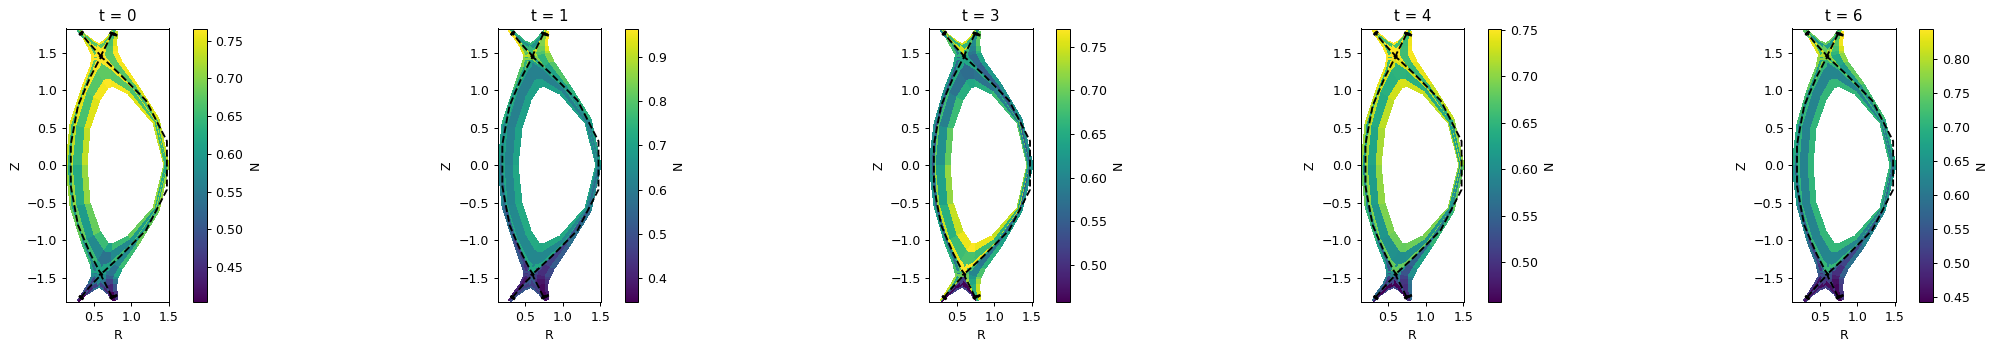

In [7]:
nx = ds.metadata["nx"]
ny = ds.metadata["ny"]
nz = ds.metadata["nz"]

tlist = np.linspace(0,6, 5, dtype=int)

fig, axes = plt.subplots(1, len(tlist), figsize = (5*len(tlist), 4), dpi = 90)

for i, t in enumerate(tlist):
    # domain = ds.isel(t=t, zeta = int(nz/2), x = slice(2,-2), theta = slice(2,-2))
    domain = ds.isel(t=t, zeta = 0)
    # domain["N"].plot(ax = axes[i], 
    #                 vmin = None, 
    #                 vmax = None
    #                 )
    
    domain["N"].bout.pcolormesh(ax = axes[i], 
                    vmin = None, 
                    vmax = None
                    )

    axes[i].set_title(f"t = {t}")
    axes[i].grid(which="both", visible  = False)
    
fig.tight_layout()

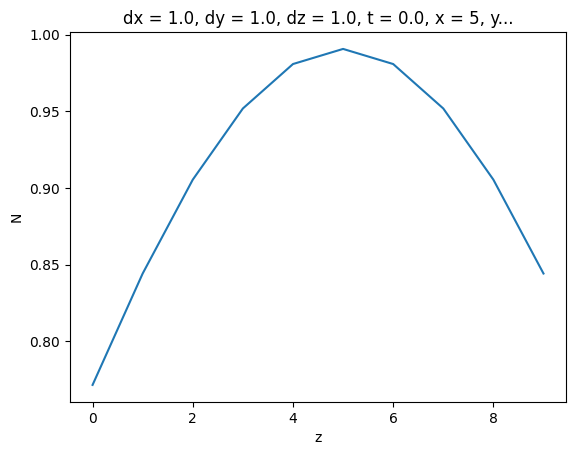

In [ ]:
tind = 0
xslice = ds[{"y":5, "z":5, "t":tind}]
yslice = ds[{"x":5, "z":5, "t":tind}]
zslice = ds[{"x":5, "y":5, "t":tind}]
zplane = ds[{"z":5}]

zslice["N"].plot()

In [5]:
with nc.Dataset(r"/ssd_scratch/BOUT/BOUT-dev/examples/diffusion-3d/hypnotoad_example_lsn_5x10.nc") as ds:
    for param in ["nx", "ny", "ixseps1", "ixseps2", "jyseps1_1", "jyseps1_2", "jyseps2_1", "jyseps2_2"]:
        print(f"{param}: {ds[param][:]}")

nx: 10
ny: 16
ixseps1: 5
ixseps2: 10
jyseps1_1: 3
jyseps1_2: 8
jyseps2_1: 8
jyseps2_2: 11
